<a href="https://colab.research.google.com/github/thanhnguyen2612/diveintocode-ml/blob/master/ML_Week4_preclass_ass2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introductory Machine Learning Pre-class assignment 2 Predicting House Prices

## [Problem 1] Feature selection for practice

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Extract necessary data
df_full = pd.read_csv('sample_data/house_price_train.csv')
df = df_full[['GrLivArea', 'YearBuilt', 'SalePrice']]
df.head()

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


## [Problem 2] Estimation and evaluation by linear regression

In [3]:
print(df.isnull().sum())

GrLivArea    0
YearBuilt    0
SalePrice    0
dtype: int64


No missing data, good. Let's visualize

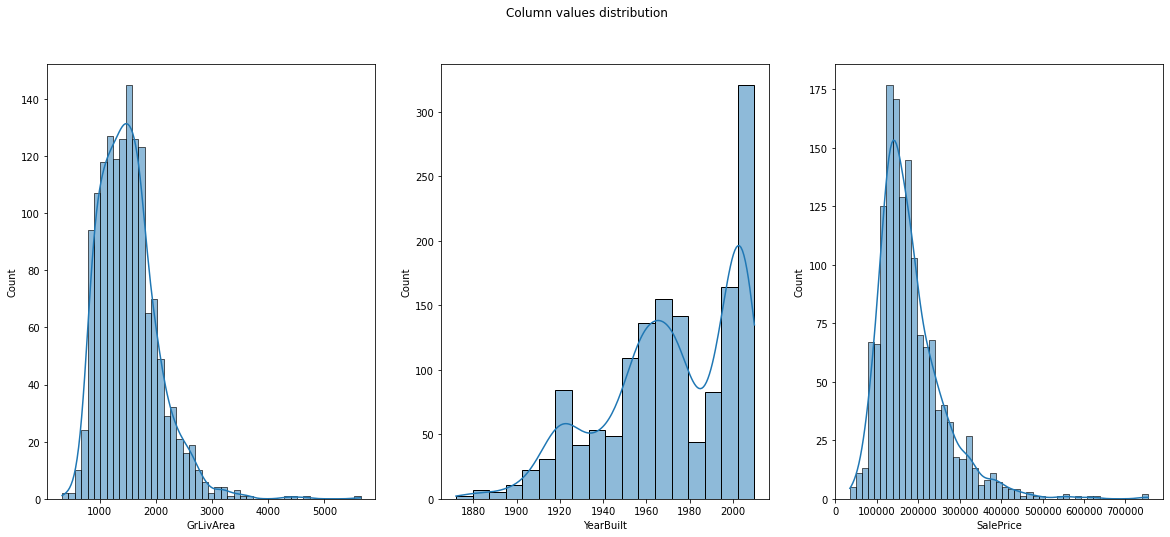

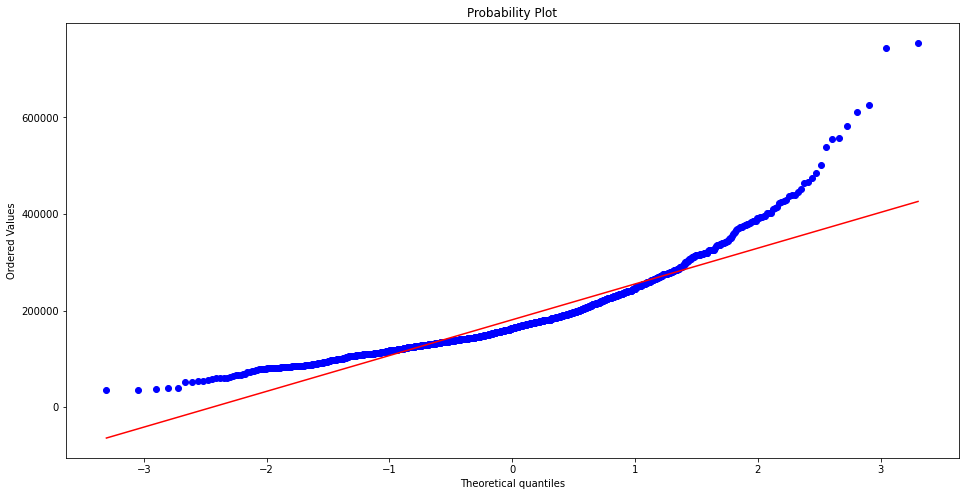

In [4]:
from scipy.stats import probplot

fig, ax = plt.subplots(1, 3, figsize=(20, 8))
fig.suptitle("Column values distribution")
sns.histplot(data=df, x='GrLivArea', kde=True, ax=ax[0])
sns.histplot(data=df, x='YearBuilt', kde=True, ax=ax[1])
sns.histplot(data=df, x='SalePrice', kde=True, ax=ax[2])
plt.show()

plt.figure(figsize=(16, 8))
plt.xlabel("SalePrice")
probplot(df['SalePrice'], plot=plt)
plt.show()

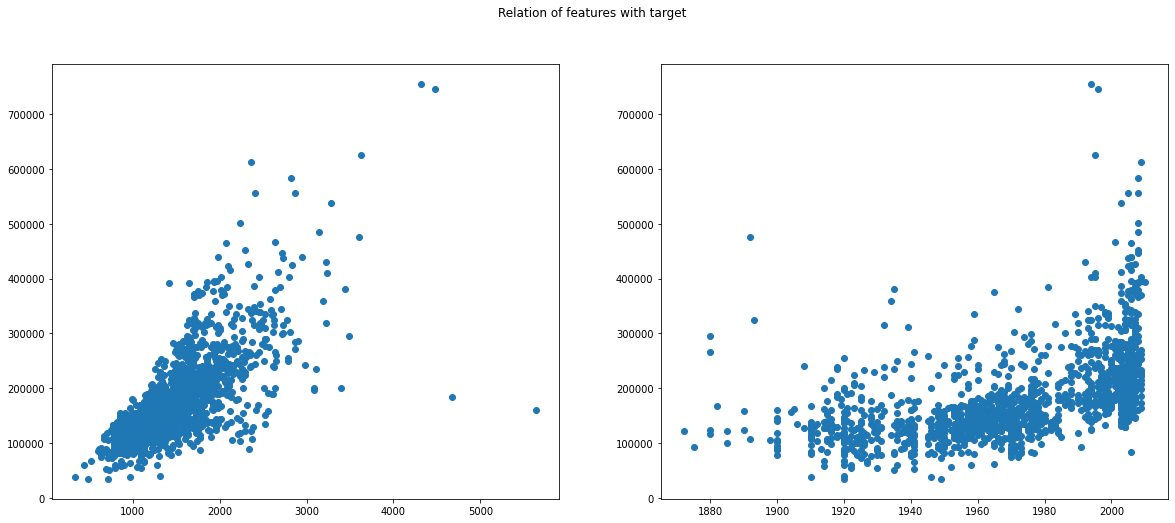

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle("Relation of features with target")
ax[0].scatter(df['GrLivArea'], df['SalePrice'])
ax[1].scatter(df['YearBuilt'], df['SalePrice'])
plt.show()

*   **SalePrice** doesn't follow normal distribution which will not good for training model. We can take advantage of log normalization to resolve skew distribution, moreover, after predicting we can restore **SalePrice** to original metric by exponent operator.
*   **GrLivArea & YearBuilt** can be scaled by StandardScaler.

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def preprocessing_and_split(data, scaler):
    """
    @Param:
        data with columns ['GrLivArea', 'YearBuilt', 'SalePrice']
    @Return:
        data with ['GrLivArea_scaled', 'YearBuilt_scaled', 'SalePrice_log']
    """
    X, y = data[:, :-1], data[:, -1]
    log_y = np.log(y)
    X_train, X_val, y_train, y_val = train_test_split(X, log_y, test_size=0.25, random_state=0)

    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    return X_train, X_val, y_train, y_val

X_train, X_val, y_train, y_val = preprocessing_and_split(df.values, StandardScaler())

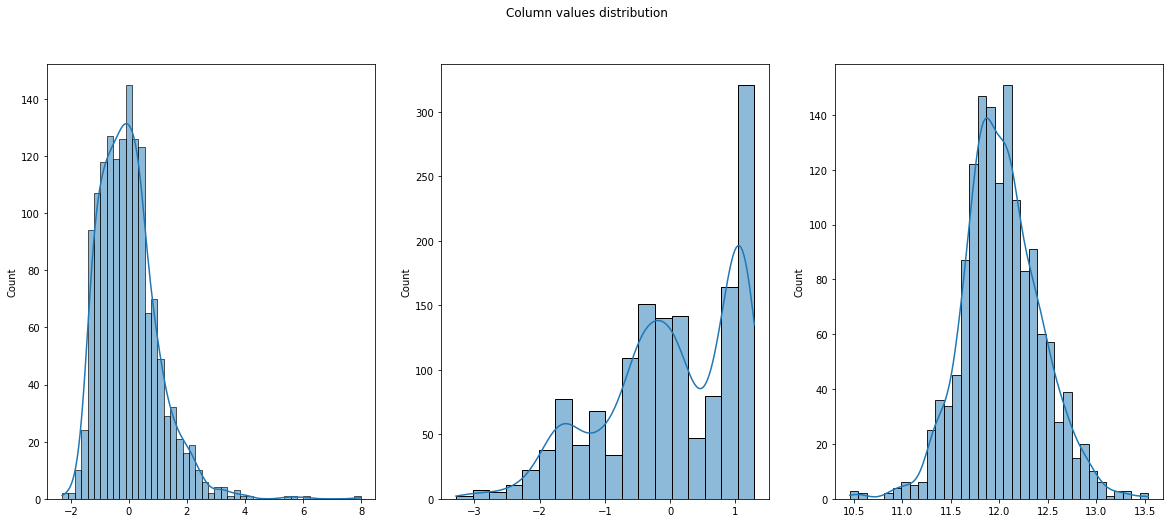

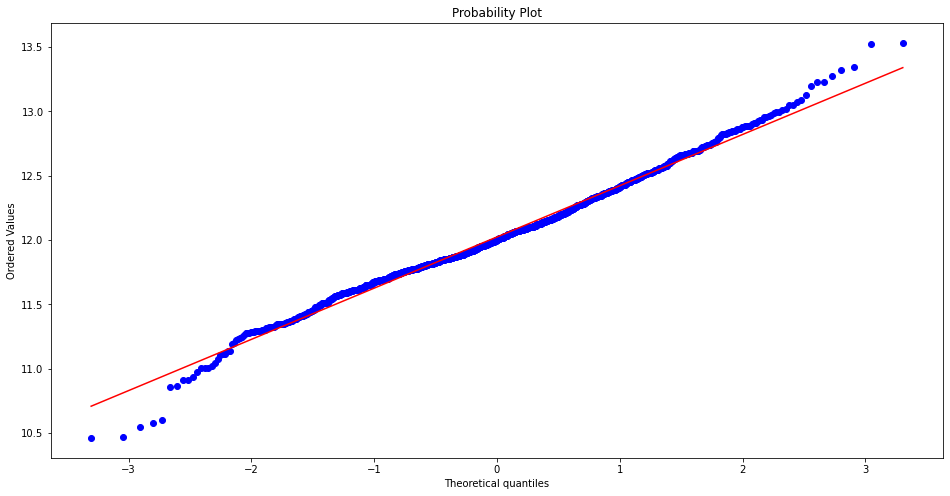

In [7]:
# Visualize after preprocessing data
fig, ax = plt.subplots(1, 3, figsize=(20, 8))
fig.suptitle("Column values distribution")
sns.histplot(x=np.vstack([X_train, X_val])[:, 0], kde=True, ax=ax[0])
sns.histplot(x=np.vstack([X_train, X_val])[:, 1], kde=True, ax=ax[1])
sns.histplot(x=np.hstack([y_train, y_val]), kde=True, ax=ax[2])
plt.show()

plt.figure(figsize=(16, 8))
plt.xlabel("SalePrice")
probplot(np.hstack([y_train, y_val]), plot=plt)
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print(f"MSE score: {mse:.4f}")

MSE score: 0.0536


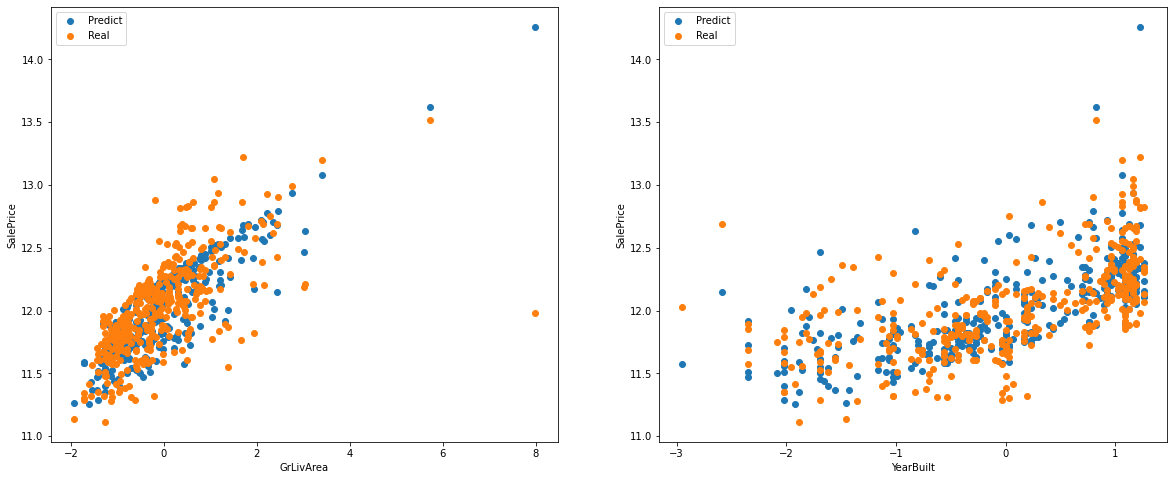

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
ax[0].set_xlabel("GrLivArea")
ax[0].set_ylabel("SalePrice")
ax[0].scatter(X_val[:, 0], y_pred, label="Predict")
ax[0].scatter(X_val[:, 0], y_val, label="Real")
ax[0].legend()
ax[1].set_xlabel("YearBuilt")
ax[1].set_ylabel("SalePrice")
ax[1].scatter(X_val[:, 1], y_pred, label="Predict")
ax[1].scatter(X_val[:, 1], y_val, label="Real")
ax[1].legend()
plt.show()

### Compare methods

In [10]:
def train_model(data, model, model_name, scaler=StandardScaler()):
    """
    Train model and visualize result
    @Param:
        data: ndarray
    @Return:
        mean squared error (MSE)
    """
    X_train, X_val, y_train, y_val = preprocessing_and_split(data, scaler)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    print(model_name, f"MSE: {mse:.4f}")

    fig, ax = plt.subplots(1, 2, figsize=(20, 8))
    ax[0].set_xlabel("GrLivArea")
    ax[0].set_ylabel("SalePrice")
    ax[0].scatter(X_val[:, 0], y_pred, label="Predict")
    ax[0].scatter(X_val[:, 0], y_val, label="Real")
    ax[0].legend()
    ax[1].set_xlabel("YearBuilt")
    ax[1].set_ylabel("SalePrice")
    ax[1].scatter(X_val[:, 1], y_pred, label="Predict")
    ax[1].scatter(X_val[:, 1], y_val, label="Real")
    ax[1].legend()
    plt.show()

    return mse

Linear Regression MSE: 0.0536


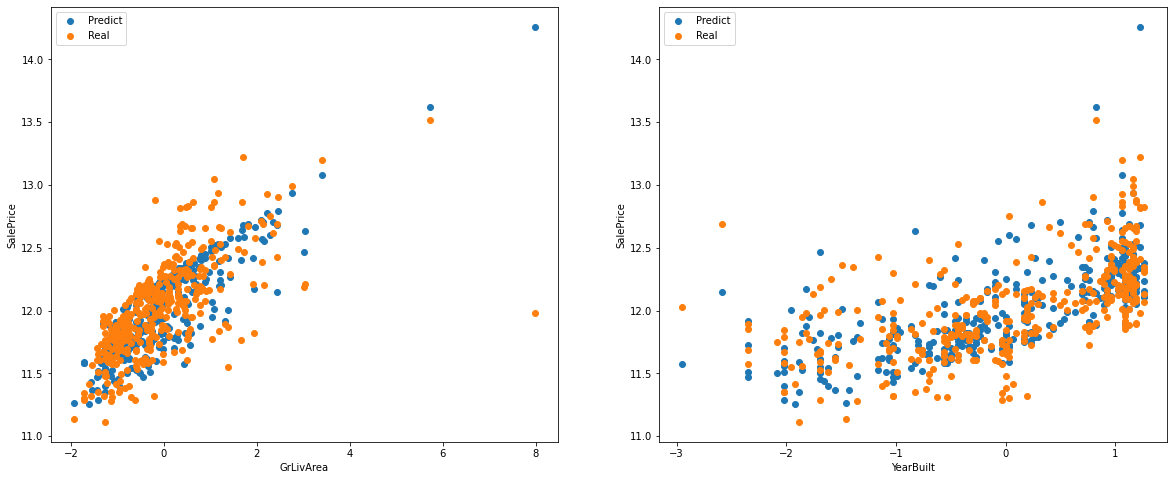

Support Vector Machine MSE: 0.0372


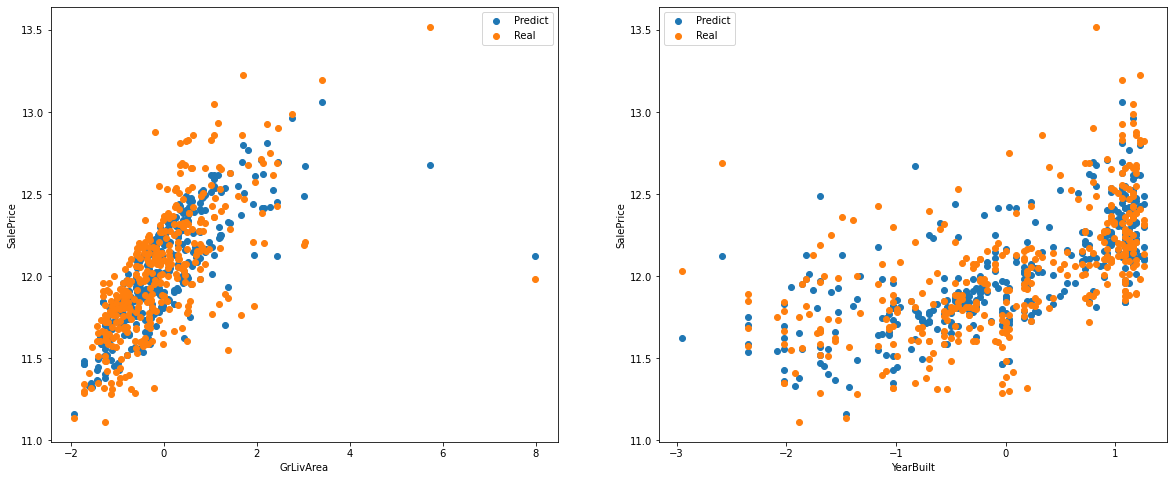

Decision Tree MSE: 0.0729


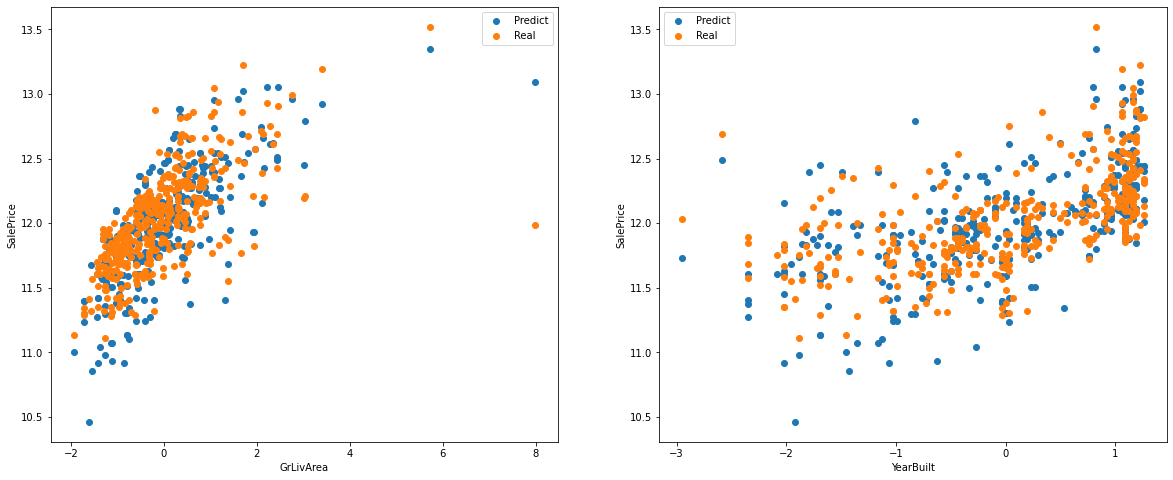

Random Forest MSE: 0.0415


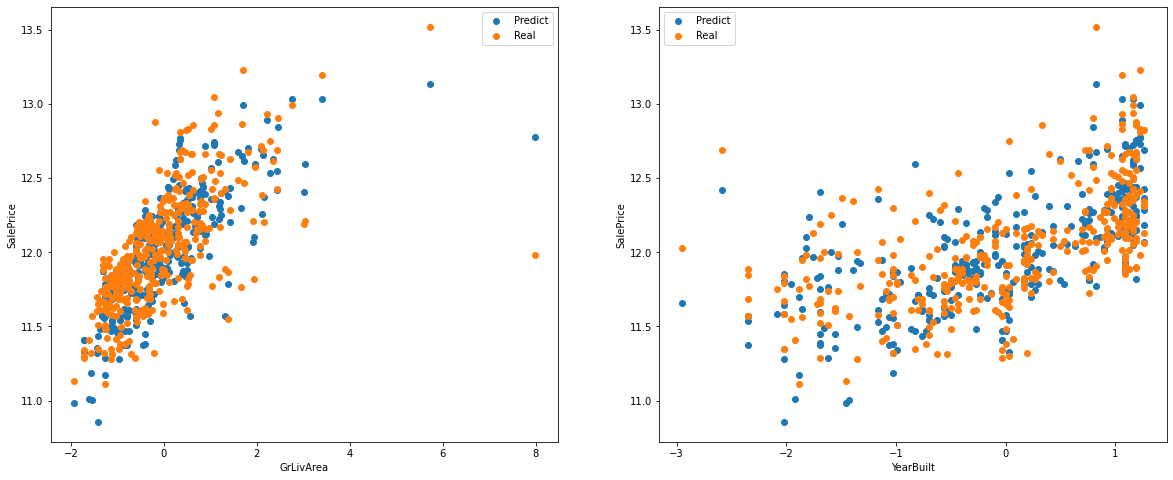

,Mean Squared Error (MSE)
Linear Regression,0.053620
Support Vector Machine,0.037214
Decision Tree,0.072884
Random Forest,0.041488


In [11]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

models = [LinearRegression(), SVR(), DecisionTreeRegressor(), RandomForestRegressor()]
model_names = ["Linear Regression", "Support Vector Machine", "Decision Tree", "Random Forest"]
mse_scores = [train_model(df.values, model, name) for model, name in zip(models, model_names)]
mse_summary = pd.DataFrame(mse_scores, index=model_names, columns=["Mean Squared Error (MSE)"])
mse_summary

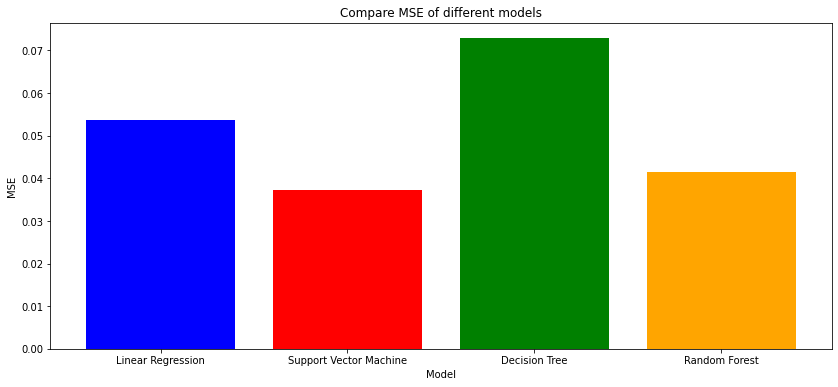

In [12]:
plt.figure(figsize=(14, 6))
plt.title("Compare MSE of different models")
plt.xlabel("Model")
plt.ylabel("MSE")
plt.bar(model_names, mse_scores, color=['b', 'r', 'g', 'orange'])
plt.show()

It's seem SVM predicts **SalePrice** better than others in this case (the smallest MSE: 0.037214)

## [Problem 4] (Advance assignment) Learning using other features

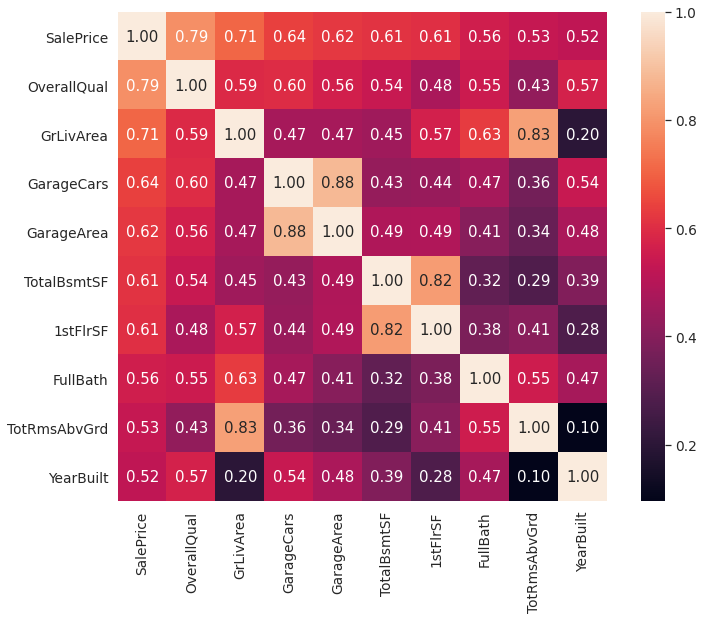

In [13]:
# Simply selecting some features to train

df_clean = df_full[df_full.columns[df_full.notnull().all()]]
corr_mat = df_clean.corr()
cols = corr_mat.nlargest(10, 'SalePrice').index
top10_corr = np.corrcoef(df_clean[cols].values.T)

sns.set(font_scale=1.25)
plt.figure(figsize=(12, 9))
sns.heatmap(top10_corr, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=cols, xticklabels=cols)
plt.show()

Those are top features may correlate to **SalePrice**; however, correlation also exists among pairs (ie. **GarageCars & GarageArea** - has been analysed on previous assignment). Let's add 3 more **OverallQual**, **GarageCars** and **TotalBsmtSF** columns to train model.

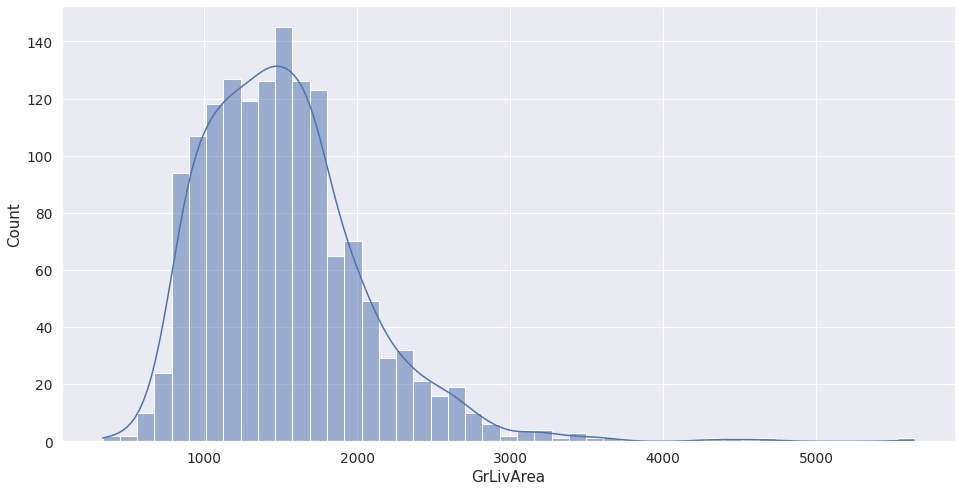

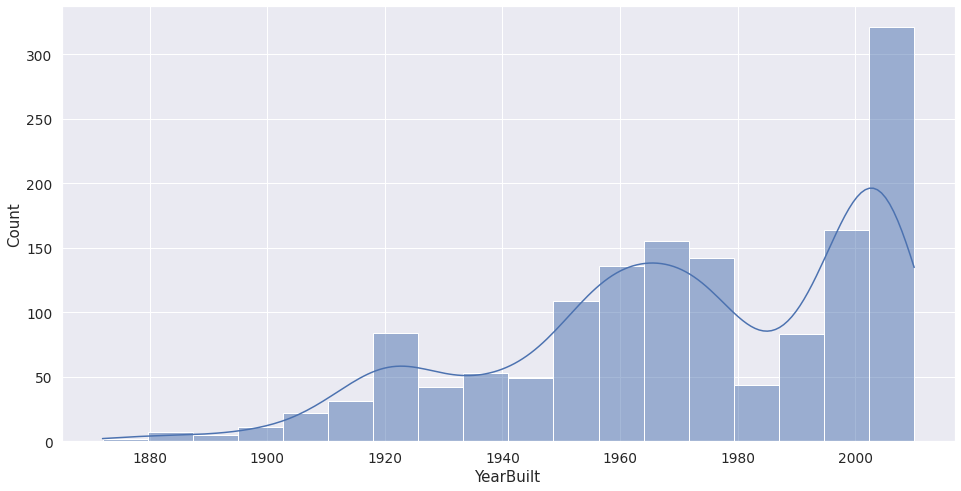

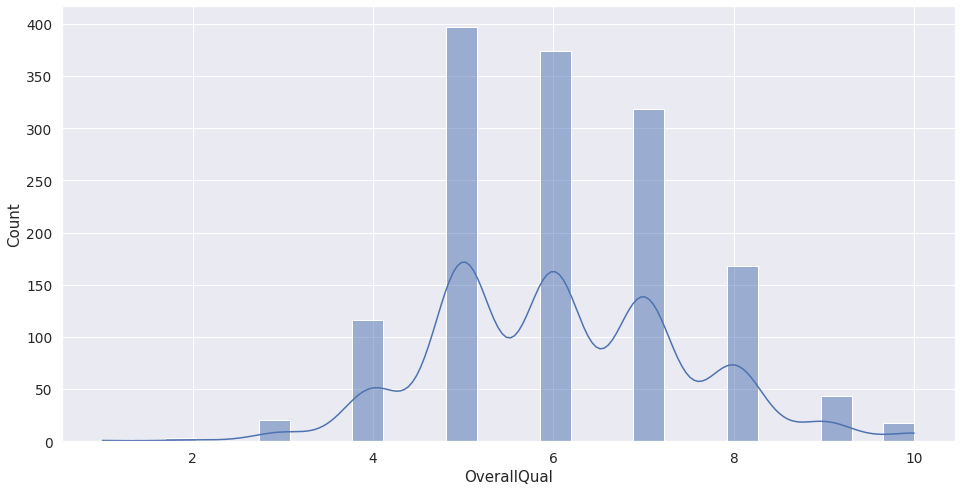

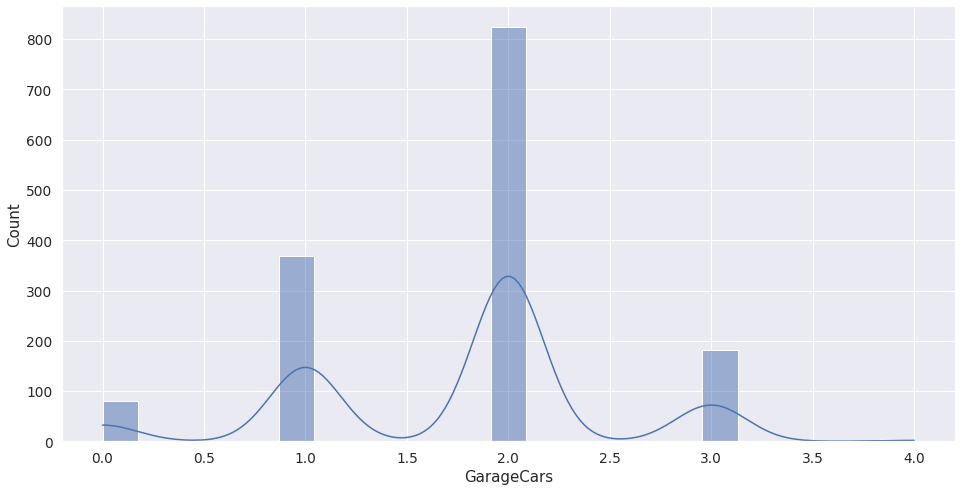

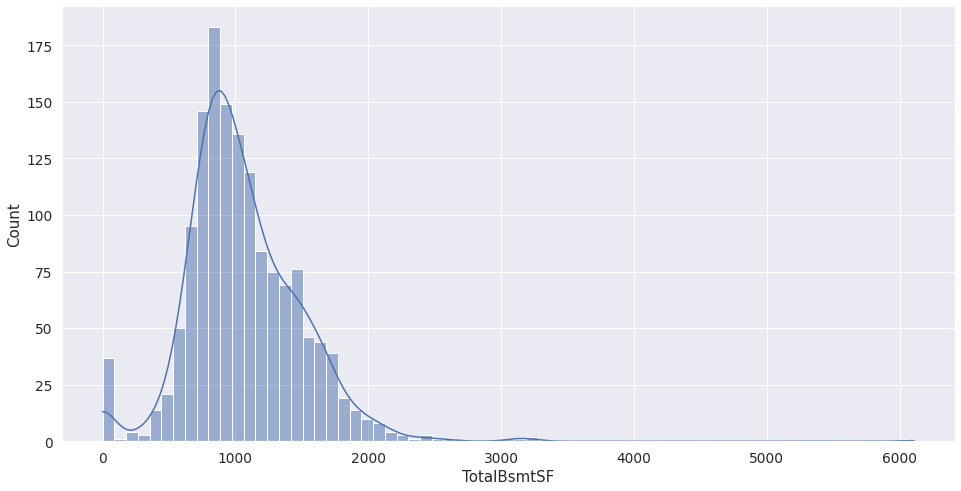

In [17]:
cols_selected = ['GrLivArea', 'YearBuilt', 'OverallQual', 'GarageCars', 'TotalBsmtSF', 'SalePrice']
df_selected = df_clean[cols_selected]

for col in cols_selected[:-1]:  # Ignore SalePrice column
    plt.figure(figsize=(16, 8))
    sns.histplot(data=df_selected, x=col, kde=True)
    plt.show()

In [15]:
def train_model_update(dataframe, model, model_name, scaler=StandardScaler()):
    """
    Train model and visualize result
    @Param:
        dataframe: pd.DataFrame (updated from old train_model)
    @Return:
        mean squared error (MSE)
    """
    cols = dataframe.columns
    data = dataframe.values
    X_train, X_val, y_train, y_val = preprocessing_and_split(data, scaler)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    print(model_name, f"MSE: {mse:.4f}")

    fig, ax = plt.subplots(1, len(cols)-1, figsize=(24, 8))
    for i, col in enumerate(cols[:-1]):
        ax[i].set_xlabel(col)
        ax[i].set_ylabel(cols[-1])
        ax[i].scatter(X_val[:, i], y_pred, label="Predict")
        ax[i].scatter(X_val[:, i], y_val, label="Real")
        ax[i].legend()
    plt.show()

    return mse

Linear Regression MSE: 0.0385


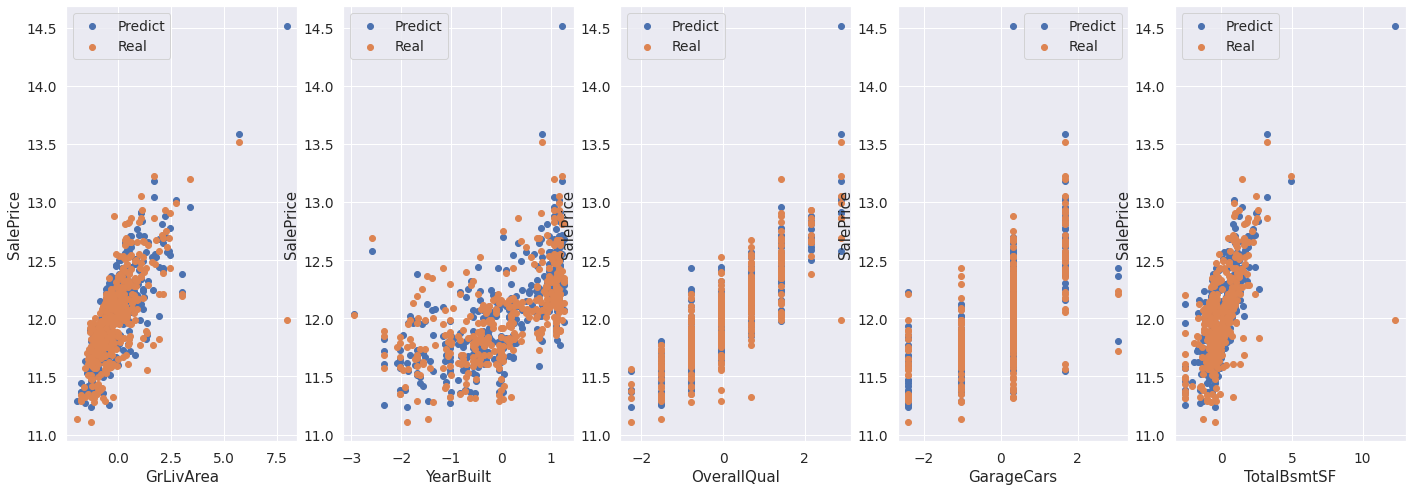

Support Vector Machine MSE: 0.0219


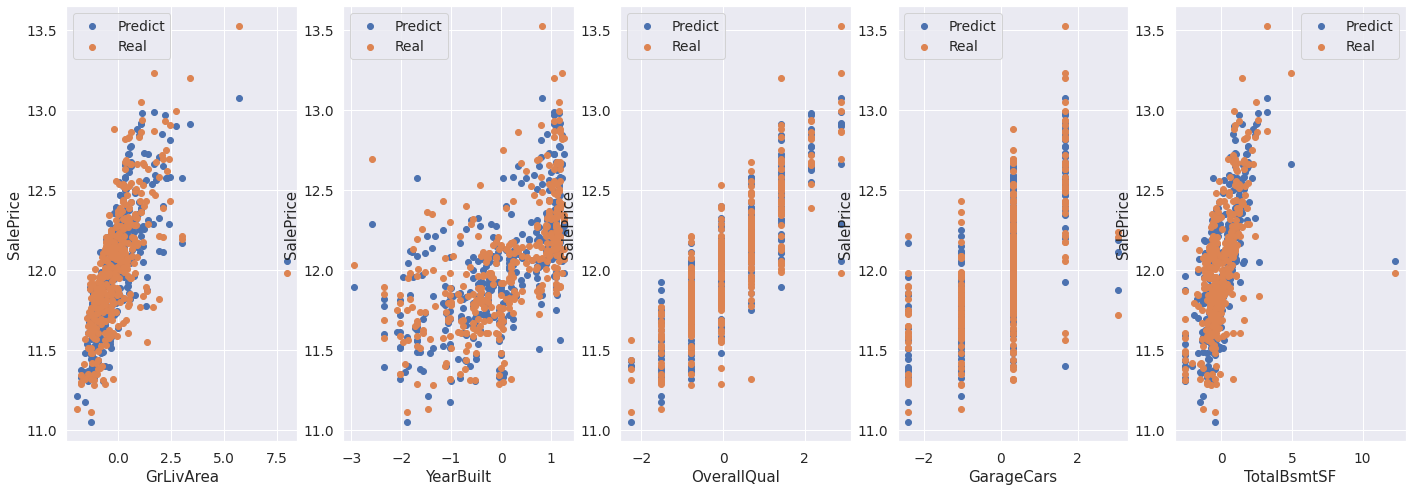

Decision Tree MSE: 0.0465


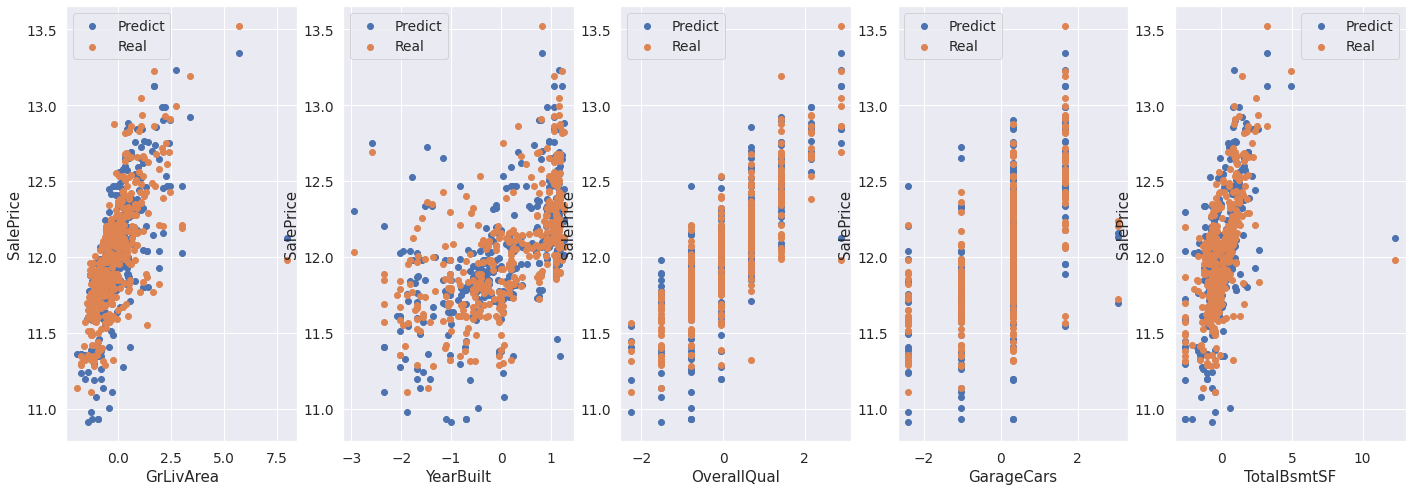

Random Forest MSE: 0.0241


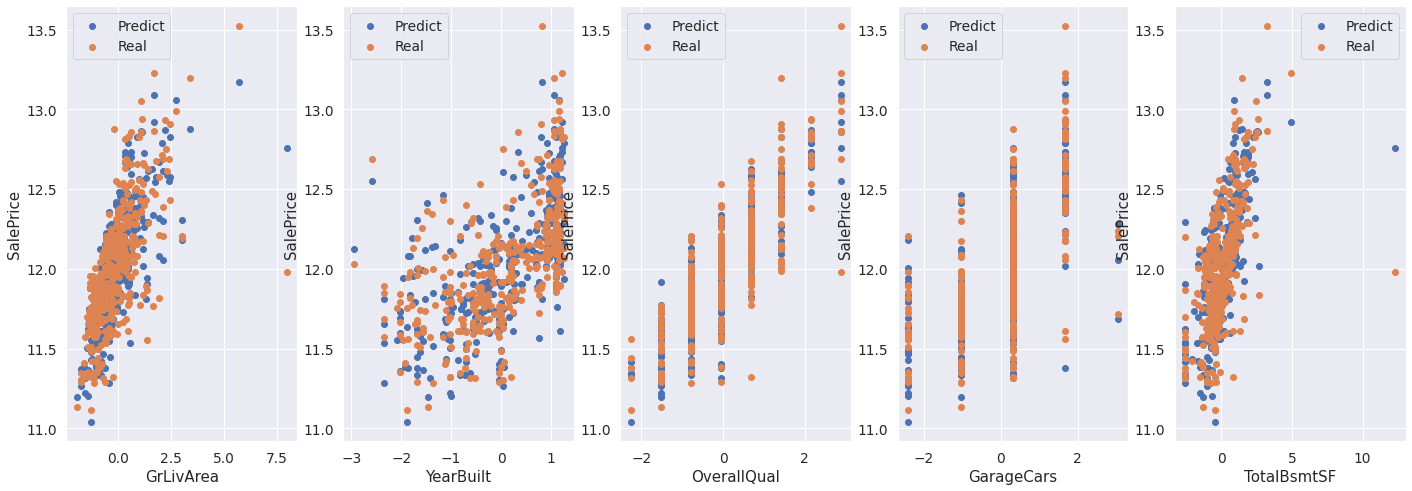

,Mean Squared Error (MSE)
Linear Regression,0.038507
Support Vector Machine,0.021891
Decision Tree,0.046468
Random Forest,0.024113


In [16]:
models = [LinearRegression(), SVR(), DecisionTreeRegressor(), RandomForestRegressor()]
model_names = ["Linear Regression", "Support Vector Machine", "Decision Tree", "Random Forest"]
mse_scores = [train_model_update(df_selected, model, name) for model, name in zip(models, model_names)]
mse_summary = pd.DataFrame(mse_scores, index=model_names, columns=["Mean Squared Error (MSE)"])
mse_summary

Most MSE scores are improved thanks to more information features, still SVM does better than others.